In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import os
import scipy

In [32]:
ttest_pvalues = np.zeros(shape=(3,3))
wilcoxon_pvalues = np.zeros(shape=(3,3))
mannwhitney_pvalues = np.zeros(shape=(3,3))

groups = {"LDA": 0, "QDA": 1, "Trees": 2}
labels = ["LDA", "QDA", "Trees"]
dir = "experiment3/finalgraphs"

for trained_on in groups.keys():    
    for eval_on in groups.keys(): 
        no_aug_dir = f"../experiment3/trained{trained_on}/eval{eval_on}/aggregate_no_augment/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(no_aug_dir, 'r') as no_aug_file:
            lines1 = no_aug_file.readlines()
        
        aug_dir = f"../experiment3/trained{trained_on}/eval{eval_on}/aggregate_augment/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(aug_dir, 'r') as aug_file:
            lines2 = aug_file.readlines()
        # print(trained_on + eval_on + lines[1])
        
        population_no_aug = eval(lines1[0])
        population_aug = eval(lines2[0])
        
        mannwhitney_result = scipy.stats.mannwhitneyu(population_aug, population_no_aug)
        pvalue = mannwhitney_result.pvalue
        mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = pvalue

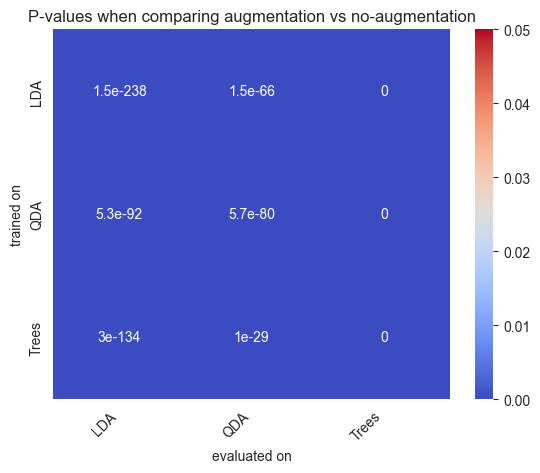

In [33]:
plot = sns.heatmap(mannwhitney_pvalues, 
            cmap="coolwarm",
            annot=True,
            vmax=0.05,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "P-values when comparing augmentation vs no-augmentation"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"../{dir}/{name}", bbox_inches="tight")
plt.show()

# Test if augment for Trees is significantly better

In [25]:
augment_dir = "../experiment2/trainedTrees/evalTrees/aggregate_augment/data_summary_trainedTrees_evalTrees.txt"
no_augment_dir = "../experiment1/trainedTrees/evalTrees/aggregate/data_summary_trainedTrees_evalTrees.txt"

with open(augment_dir, 'r') as baseline_file:
    lines_baseline = baseline_file.readlines()
augment_population = eval(lines_baseline[0])

with open(no_augment_dir, 'r') as file2:
    lines = file2.readlines()
no_augment_population = eval(lines[0])

mannwhitney_result = scipy.stats.mannwhitneyu(augment_population, no_augment_population)
pvalue_augment = mannwhitney_result.pvalue

print(f"The p-value is: {pvalue_augment}")

The p-value is: 0.0


# Domain shift significance of non-augment

In [34]:
ttest_pvalues = np.zeros(shape=(3,3))
wilcoxon_pvalues = np.zeros(shape=(3,3))
mannwhitney_pvalues = np.zeros(shape=(3,3))

groups = {"LDA": 0, "QDA": 1, "Trees": 2}
labels = ["LDA", "QDA", "Trees"]
dir = "experiment3/finalgraphs"

for trained_on in groups.keys():
    # baseline_dir = f"experiment2/trained{trained_on}/eval{trained_on}/aggregate_augment/data_summary_trained{trained_on}_eval{trained_on}.txt"
    baseline_dir = f"../experiment3/trained{trained_on}/eval{trained_on}/aggregate_no_augment/data_summary_trained{trained_on}_eval{trained_on}.txt"
    with open(baseline_dir, 'r') as baseline_file:
            lines_baseline = baseline_file.readlines()
    baseline_population = eval(lines_baseline[0])
    
    for eval_on in groups.keys(): 
        if trained_on == eval_on:
            ttest_pvalues[groups[trained_on], groups[eval_on]] = 1.0
            mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = 1.0
            continue
        file_dir = f"../experiment3/trained{trained_on}/eval{eval_on}/aggregate_no_augment/data_summary_trained{trained_on}_eval{eval_on}.txt"
        with open(file_dir, 'r') as file:
            lines = file.readlines()
            
        # print(trained_on + eval_on + lines[1])
        
        population_2 = eval(lines[0])
        
        mannwhitney_result = scipy.stats.mannwhitneyu(baseline_population, population_2)
        pvalue3 = mannwhitney_result.pvalue
        mannwhitney_pvalues[groups[trained_on], groups[eval_on]] = pvalue3
        
mask = np.eye(3, dtype=bool)

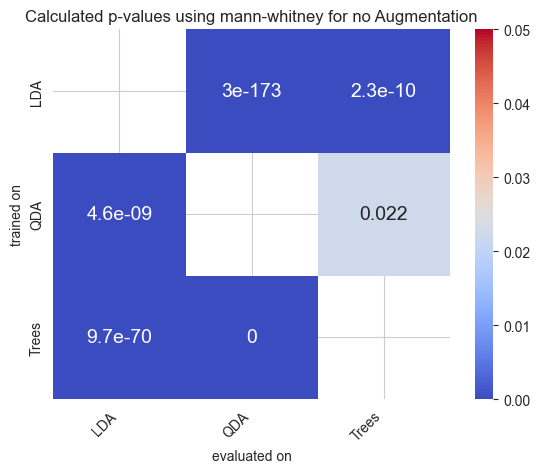

In [36]:
plot = sns.heatmap(mannwhitney_pvalues, 
            mask= mask,
            cmap="coolwarm",
            annot_kws={"size": 14},
            annot=True,
            vmax=0.05,
            xticklabels=labels,
            yticklabels=labels)
plot.set(ylabel="trained on", xlabel="evaluated on")
plot.set_xticklabels(labels= labels, rotation=45, ha="right")
name = "Calculated p-values using mann-whitney for no Augmentation"
plot.set_title(name)
os.makedirs(dir, exist_ok=True)
plt.savefig(f"../{dir}/{name}", bbox_inches="tight")
plt.show()